In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
#import csv
ess_data = pd.read_csv("./ESSdata_Thinkful_1.4.8.csv")
df = pd.DataFrame(ess_data)

In [3]:
ess_data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [4]:
ess_data.shape

(8594, 13)

In [5]:
ess_data.groupby(['cntry'],as_index = False).mean()
#appendix.groupby(['Institution'], as_index = False).mean()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,1.480680e+03,6.5,3.103560,5.714748,6.285159,5.698834,8.102398,5.120623,2.743287,1.513583,46.743180,1.362872
1,CZ,1.445666e+03,6.5,4.913806,4.393731,4.931905,4.484363,6.842835,4.547328,2.658423,1.525268,46.301563,1.426606
2,DE,1.100048e+07,6.5,4.000000,5.285714,6.222222,5.444444,7.642857,4.714286,2.785714,1.571429,55.892857,1.250000
3,ES,1.467607e+03,6.5,3.996701,5.004950,5.347303,4.537443,7.484323,5.244426,2.588358,1.504534,47.874576,1.385537
4,NO,1.430671e+04,6.5,3.771546,6.623973,6.894376,6.043240,8.082990,5.416553,2.912148,1.466484,46.536212,1.369431
5,SE,1.765173e+03,6.5,3.638567,6.158214,6.697790,6.061224,7.927152,5.477135,2.898671,1.476872,49.040046,1.387115


Let us convert the year from 6 and 7 to 2012 and 2014

In [6]:
def convert_date(value):
    if value == 6:
        return 2012
    elif value == 7:
        return 2014
     
ess_data['year'] = ess_data['year'].apply(convert_date)

In [7]:
ess_data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


After grouping we got 6 different countries.Let us form dataset foe each of the country.

In [8]:
Switzerland_df = ess_data[ess_data['cntry'] == 'CH']
CzechRepublic_df = ess_data[ess_data['cntry'] == 'CZ']
Spain_df = ess_data[ess_data['cntry'] == 'ES']
Norway_df = ess_data[ess_data['cntry'] == 'NO']
Sweden_df = ess_data[ess_data['cntry'] == 'SE']
Germany_df = ess_data[ess_data['cntry'] == 'DE']

## 1.Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [9]:
Switzerland_df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


### Switzerland

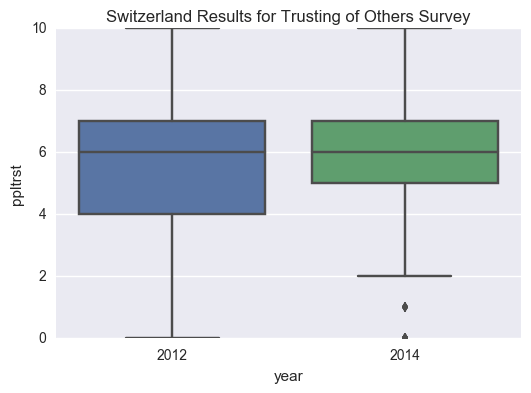

In [10]:
sns.boxplot(y="ppltrst", x="year", data=Switzerland_df)
sns.plt.title('Switzerland Results for Trusting of Others Survey')
plt.show()

In [11]:
stats.kruskal(Switzerland_df.query('year == 2012').ppltrst,
              Switzerland_df.query('year == 2014').ppltrst)

KruskalResult(statistic=0.30163599644480188, pvalue=0.58285861114420479)

### CzechRepublic

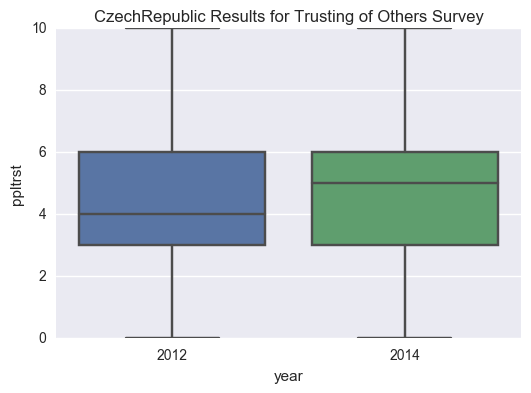

In [12]:
sns.boxplot(y="ppltrst", x="year", data=CzechRepublic_df)
sns.plt.title('CzechRepublic Results for Trusting of Others Survey')
plt.show()

In [13]:
stats.kruskal(CzechRepublic_df.query('year == 2012').ppltrst,
              CzechRepublic_df.query('year == 2014').ppltrst, nan_policy='omit')

KruskalResult(statistic=0.72115913853012281, pvalue=0.39576395374563522)

### Spain

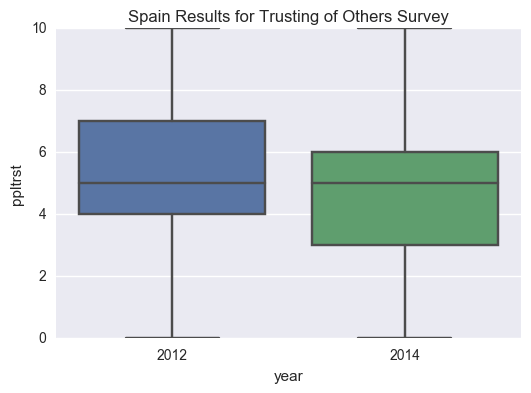

In [14]:
sns.boxplot(y="ppltrst", x="year", data=Spain_df)
sns.plt.title('Spain Results for Trusting of Others Survey')
plt.show()

In [15]:
stats.kruskal(Spain_df.query('year == 2012').ppltrst,
              Spain_df.query('year == 2014').ppltrst, nan_policy='omit')

KruskalResult(statistic=8.216087354735361, pvalue=0.0041520627675982)

### Norway

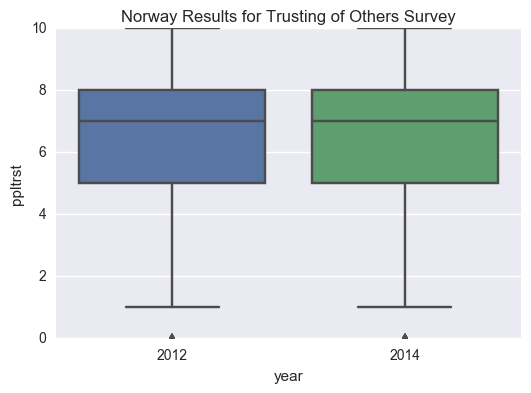

In [16]:
sns.boxplot(y="ppltrst", x="year", data=Norway_df)
sns.plt.title('Norway Results for Trusting of Others Survey')
plt.show()

In [17]:
stats.kruskal(Norway_df.query('year == 2012').ppltrst,
              Norway_df.query('year == 2014').ppltrst, nan_policy='omit')

KruskalResult(statistic=0.24473874253133701, pvalue=0.62080430049698654)

### Sweden

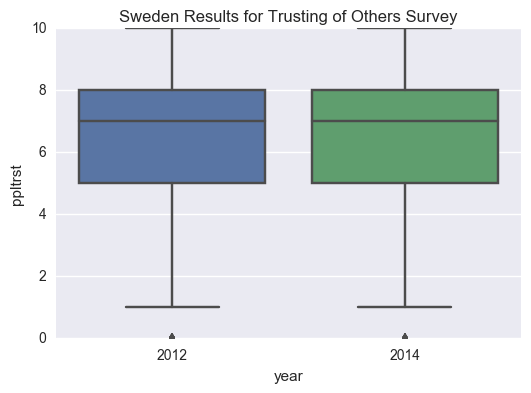

In [18]:
sns.boxplot(y="ppltrst", x="year", data=Sweden_df)
sns.plt.title('Sweden Results for Trusting of Others Survey')
plt.show()

In [19]:
stats.kruskal(Sweden_df.query('year == 2012').ppltrst,
              Sweden_df.query('year == 2014').ppltrst, nan_policy='omit')

KruskalResult(statistic=4.2412547110440508, pvalue=0.03945299959307013)

### Germany

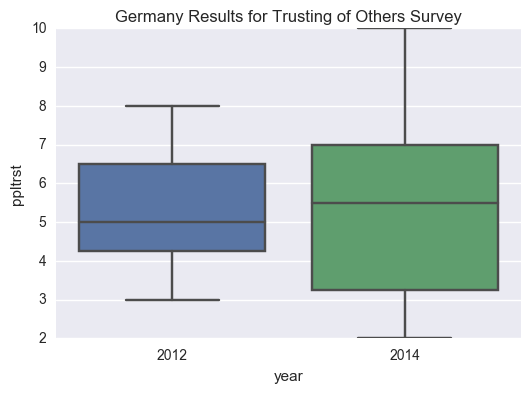

In [20]:
sns.boxplot(y="ppltrst", x="year", data=Germany_df)
sns.plt.title('Germany Results for Trusting of Others Survey')
plt.show()

We found the difference in results only in Spain.

## 2.Did people become happier from 2012 to 2014? Compute results for each country in the sample.

### Switzerland

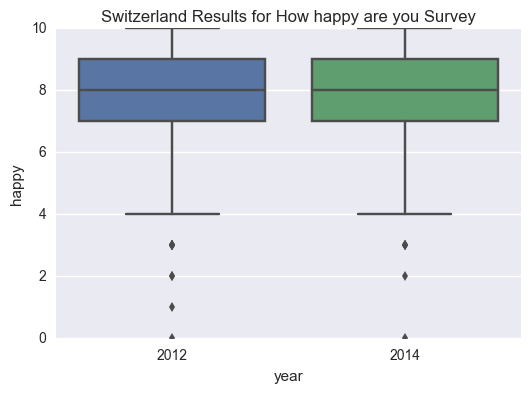

In [21]:
sns.boxplot(y="happy", x="year", data=Switzerland_df)
sns.plt.title('Switzerland Results for How happy are you Survey')
plt.show()

In [22]:
stats.kruskal(Switzerland_df.query('year == 2012').happy,
              Switzerland_df.query('year == 2014').happy, nan_policy='omit')

KruskalResult(statistic=0.22331955287588717, pvalue=0.63652214320425471)

### CzechRepublic

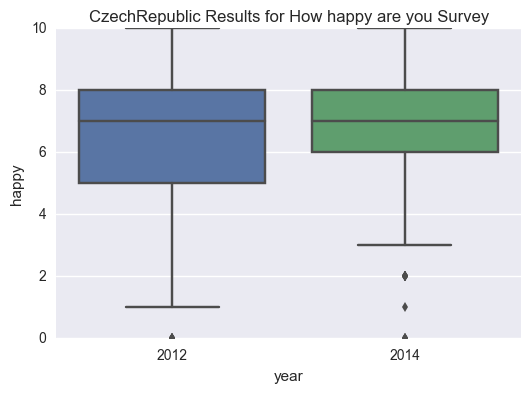

In [23]:
sns.boxplot(y="happy", x="year", data=CzechRepublic_df)
sns.plt.title('CzechRepublic Results for How happy are you Survey')
plt.show()

In [24]:
stats.kruskal(CzechRepublic_df.query('year == 2012').happy,
              CzechRepublic_df.query('year == 2014').happy, nan_policy='omit')

KruskalResult(statistic=1.4258218687180508, pvalue=0.23244752383800671)

### Spain

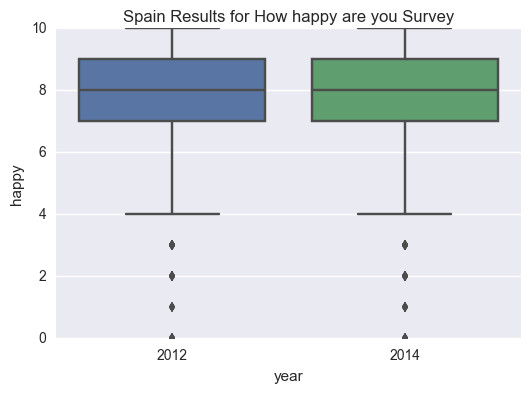

In [25]:
sns.boxplot(y="happy", x="year", data=Spain_df)
sns.plt.title('Spain Results for How happy are you Survey')
plt.show()

In [26]:
stats.kruskal(Spain_df.query('year == 2012').happy,
              Spain_df.query('year == 2014').happy, nan_policy='omit')

KruskalResult(statistic=4.0892036411772681, pvalue=0.043157971896250848)

### Norway

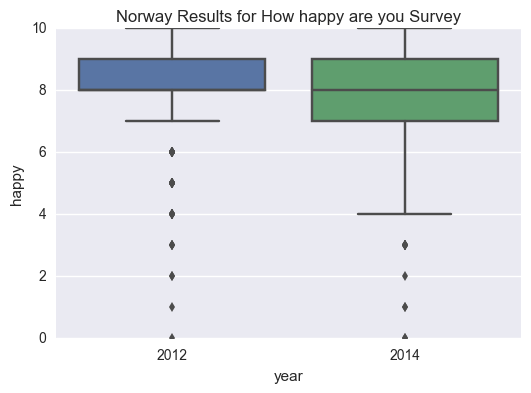

In [27]:
sns.boxplot(y="happy", x="year", data=Norway_df)
sns.plt.title('Norway Results for How happy are you Survey')
plt.show()

In [28]:
stats.kruskal(Norway_df.query('year == 2012').happy,
              Norway_df.query('year == 2014').happy, nan_policy='omit')

KruskalResult(statistic=19.139561932891844, pvalue=1.215001301639077e-05)

### Sweden

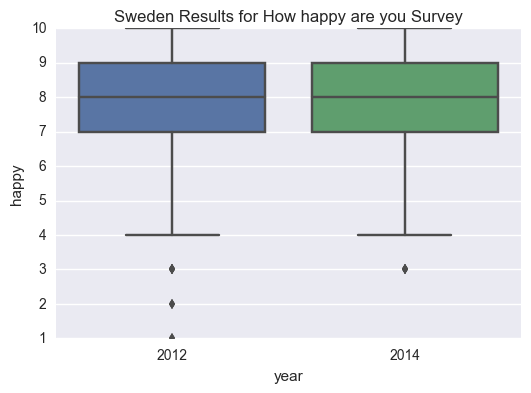

In [29]:
sns.boxplot(y="happy", x="year", data=Sweden_df)
sns.plt.title('Sweden Results for How happy are you Survey')
plt.show()

In [30]:
stats.kruskal(Sweden_df.query('year == 2012').happy,
              Sweden_df.query('year == 2014').happy, nan_policy='omit')

KruskalResult(statistic=0.050457345200528352, pvalue=0.82226936153714048)

### Germany

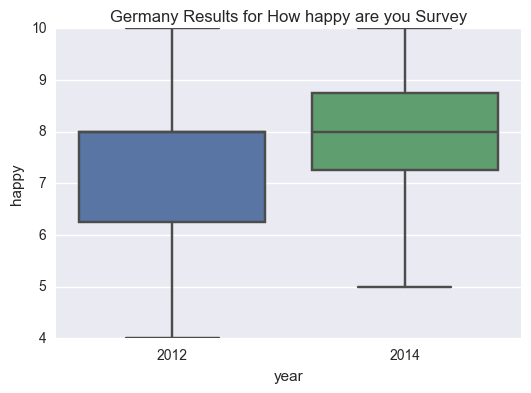

In [31]:
sns.boxplot(y="happy", x="year", data=Germany_df)
sns.plt.title('Germany Results for How happy are you Survey')
plt.show()

In [32]:
stats.kruskal(Germany_df.query('year == 2012').happy,
              Germany_df.query('year == 2014').happy, nan_policy='omit')

KruskalResult(statistic=0.39056749122656015, pvalue=0.53200125505866203)

People in Norway were less happy in 2012 as compared to other countries.

## 3. Who reported watching more TV in 2012, men or women?

In [33]:
df_tv = ess_data.groupby(['gndr','year'])
df_tv.describe()

C:\Users\NutanMandale\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


agea        happy          idno      partner  \
gndr year                                                              
1.0  2012 count  2089.000000  2145.000000  2.154000e+03  2152.000000   
          mean     46.965055     7.744522  3.447705e+04     1.353625   
          std      17.969622     1.722329  5.797237e+05     0.478205   
          min      15.000000     0.000000  1.000000e+01     1.000000   
          25%            NaN          NaN  1.057250e+03          NaN   
          50%            NaN          NaN  1.800000e+03          NaN   
          75%            NaN          NaN  2.799750e+03          NaN   
          max     103.000000    10.000000  1.100140e+07     2.000000   
     2014 count  2102.000000  2159.000000  2.162000e+03  2157.000000   
          mean     46.980971     7.715146  3.443956e+04     1.375058   
          std      18.474460     1.624622  5.786456e+05     0.484250   
          min      15.000000     0.000000  3.000000e+00     1.000000   
          25%            NaN          NaN  1.057000e+03          NaN   
          50%            NaN          NaN  1.773500e+03          NaN   
          75%            NaN          NaN  2.818500e+03          NaN   
          max     114.000000    10.000000  1.100097e+07     2.000000   
2.0  2012 count  2082.000000  2131.000000  2.143000e+03  2138.000000   
          mean     48.086455     7.702487  4.464775e+04     1.399906   
          std      18.407926     1.806792  6.708246e+05     0.489993   
          min      15.000000     0.000000  1.000000e+00     1.000000   
          25%            NaN          NaN  1.048500e+03          NaN   
          50%            NaN          NaN  1.638000e+03          NaN   
          75%            NaN          NaN  2.688500e+03          NaN   
          max      97.000000    10.000000  1.100143e+07     2.000000   
     2014 count  2072.000000  2118.000000  2.125000e+03  2120.000000   
          mean     47.758687     7.618036  4.492552e+04     1.408491   
          std      18.685914     1.784570  6.736572e+05     0.491671   
          min      15.000000     0.000000  1.000000e+00     1.000000   
          25%            NaN          NaN  1.045000e+03          NaN   
          50%            NaN          NaN  1.624000e+03          NaN   
          75%            NaN          NaN  2.670000e+03          NaN   
          max     101.000000    10.000000  1.100143e+07     2.000000   

                     pplfair       pplhlp      ppltrst       sclact  \
gndr year                                                             
1.0  2012 count  2145.000000  2146.000000  2152.000000  2132.000000   
          mean      5.947786     5.291240     5.629182     2.779550   
          std       2.128799     2.173261     2.206040     0.917116   
          min       0.000000     0.000000     0.000000     1.000000   
          25%            NaN          NaN          NaN          NaN   
          50%            NaN          NaN          NaN          NaN   
          75%            NaN          NaN          NaN          NaN   
          max      10.000000    10.000000    10.000000     5.000000   
     2014 count  2152.000000  2159.000000  2161.000000  2131.000000   
          mean      5.968866     5.176471     5.627950     2.782262   
          std       2.039922     2.142920     2.200681     0.879332   
          min       0.000000     0.000000     0.000000     1.000000   
          25%            NaN          NaN          NaN          NaN   
          50%            NaN          NaN          NaN          NaN   
          75%            NaN          NaN          NaN          NaN   
          max      10.000000    10.000000    10.000000     5.000000   
2.0  2012 count  2132.000000  2136.000000  2135.000000  2119.000000   
          mean      6.048311     5.486891     5.496487     2.700802   
          std       2.142947     2.165044     2.263740     0.911657   
          min       0.000000     0.000000     0.000000     1.000000   
          25%

We dont see difference in watching tv among men and women in these 2 years

## 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

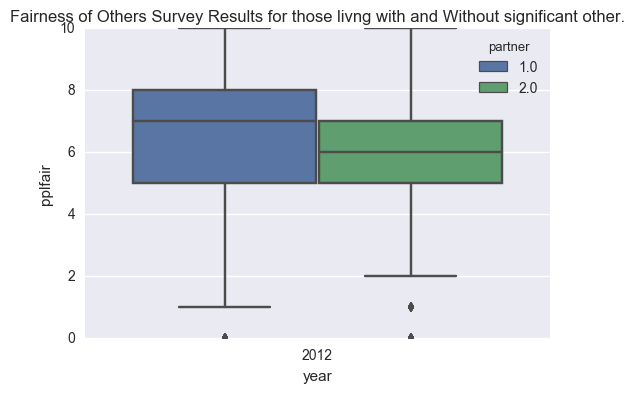

In [34]:
lone_df = ess_data.query('year == 2012').query('partner == 1.0')
partner_df = ess_data.query('year == 2012').query('partner == 2.0')
sns.boxplot(x="year", y="pplfair", hue="partner", data=ess_data.query('year == 2012'))
sns.plt.title('Fairness of Others Survey Results for those livng with and Without significant other.')
plt.show()

In [35]:
print(len(lone_df.pplfair))
print(len(partner_df.pplfair))
stats.kruskal(lone_df.pplfair, partner_df.pplfair, nan_policy='omit')

2674
1616


KruskalResult(statistic=13.739649374653519, pvalue=0.00020997468964373384)

## 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

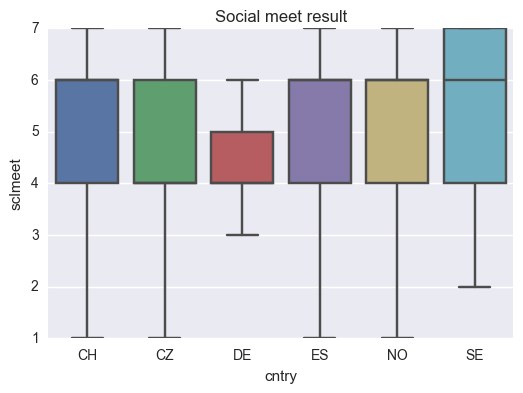

In [36]:
yr_2014 = ess_data.query('year == 2014')
sns.boxplot(x="cntry", y="sclmeet", data=yr_2014)
sns.plt.title('Social meet result')
plt.show()

In [37]:
no = ess_data.query('year == 2014').query('cntry == "NO"').sclmeet
se = ess_data.query('year == 2014').query('cntry == "SE"').sclmeet
de = ess_data.query('year == 2014').query('cntry == "DE"').sclmeet
print('Median value for the Norway is : %d' % (no.median()))
print('Median value for Sweden is : %d' % (se.median()))
print('Median value for Germany is : %d\n' % (de.median()))

Median value for the Norway is : 6
Median value for Sweden is : 6
Median value for Germany is : 4



In [38]:

stats.kruskal(no, se, de, nan_policy='omit')

KruskalResult(statistic=13.690159503963239, pvalue=0.0010646813228366533)

## 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [39]:
print(ess_data.query('year == 2014').query('cntry == "NO"').agea.describe())
print(ess_data.query('year == 2014').query('cntry == "SE"').agea.describe())
print(ess_data.query('year == 2014').query('cntry == "DE"').agea.describe())

count    718.000000
mean      46.707521
std       18.529955
min       15.000000
25%             NaN
50%             NaN
75%             NaN
max       94.000000
Name: agea, dtype: float64
count    878.000000
mean      49.403189
std       19.829526
min       15.000000
25%             NaN
50%             NaN
75%             NaN
max      114.000000
Name: agea, dtype: float64
count    14.000000
mean     59.714286
std      15.162852
min      36.000000
25%      49.750000
50%      56.500000
75%      66.500000
max      89.000000
Name: agea, dtype: float64


C:\Users\NutanMandale\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


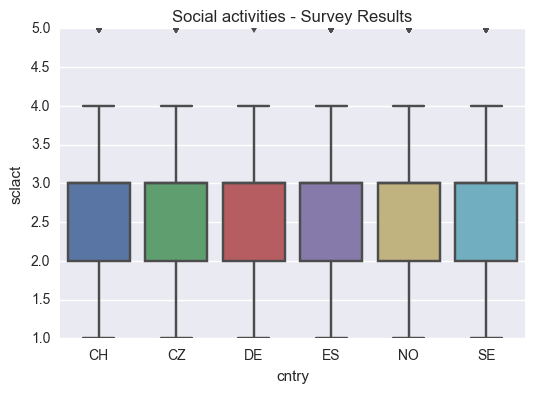

In [40]:
sns.boxplot(x="cntry", y="sclact", data=ess_data)
sns.plt.title('Social activities - Survey Results')
plt.show()

All the countries have the similar social ativities